# PDAP-2018: Exam Homework Exercise 1

## Summer term 2018
### University of Bremen / Dr. Andreas Hilboll

This is the first graded homework assignment for the course *Practical Data Analysis with Python*.  There will be two more graded homework assignment later during the semester; your total course grade will consist of the aggregated grades of all threehomework assignments.

## Rules and regulations

### When to submit
This homework must be submitted by Tuesday, 22 May 2018, 08:00:00 CET

### How to submit
For now, you can submit this homework assignment by sending the Jupyter notebook (`.ipynb` file) to [hilboll@uni-bremen.de](mailto:hilboll@uni-bremen.de).

I will post instructions on how to submit your assignment via GitHub later.

**Note:** It is *your* responsibility to make sure that your homework submission reaches me in time.  If in doubt, submit early and ask me if I received your file.

### Technical requirements
Your solution has to be written to this Jupyter Notebook.  Please rename the notebook so that your last name(s) is/are included in the filename.  Your solution has to consist of exactly one (i.e., this) file.

### Study groups
You are allowed to complete this homework assignment either alone or in groups of up to two students.  In case you do not do your homework alone, please clearly state who has contributed how much to which part of the homework.

### Discussion
At the end of the semester, there will be a separate ~20 minute oral discussion for each study group, in which all students are expected be able to demonstrate that they understand the code they submitted.

### Using internet resources
You are allowed to use book and/or internet resources to complete this homework assignment.  However, you are expected to a) clearly state any reference you have used to complete the assigment (e.g., by giving the URL to a website in a code comment), and b) to be able to explain the code you are writing.

### Evaluation criteria
You will be graded on all *tasks* laid out below.  There are some possibilities to earn extra credit, clearly indicated in the task description.

## Background

Ozone is often measured using [ozonesondes](https://www.esrl.noaa.gov/gmd/ozwv/ozsondes/).  

In this assignment, you will work with ozonesonde measurements from the [Oberpreissenberg observatory](https://www.dwd.de/EN/research/observing_atmosphere/composition_atmosphere/hohenpeissenberg/start_mohp_node.html) in Southern Germany.  The data are available from the [World Ozone and Ultraviolet Radiation Data Centre](https://woudc.org/data/explore.php).


## Obtaining the data files

The data files needed for this assignment can be downloaded at https://seafile.zfn.uni-bremen.de/f/4579f0c70b0d4368a610/.  Unpack that `.zip` archive to a folder somewhere on your harddrive.


## Technical comments

- The filename of the data files (`*.csv`) contains information about the date of the flight in its first 8 characters.
- The data files contain a lot of metadata which is of no interest in this assignment.  The data that you're interested in comes after the line `#PROFILE`, with one row per individual measurement.

## Task 0: Participants

Please fill in your personal details into the following table:

| Last name | First name | Study program | Student ID |
|-----------|------------|---------------|------------|
| Kattamuri | Siva       | PEP           | 3085574    |


## Task 1: Read the measurements contained in one single data file into a `pandas.DataFrame`

Use the function `pandas.read_csv()` to load the data contained in *one single* data file into a `pandas.DataFrame`.  The `DataFrame` should only have the three columns *air_pressure*, *ozone_partial_pressure*, and *air_temperature*, because we are only interested in those three variables.

**Hint:**
- You can use the `skiprows` argument to the `read_csv` function

In [55]:
import pandas as pd
file= '20180205.brewer-mast.na.na.dwd-mohp.csv'
data=pd.read_csv(file,skiprows=36)
data1=data.loc[:,'Pressure':'Temperature']  
data1.head()

,Pressure,O3PartialPressure,Temperature
0,904.48,1.22,-5.9
1,899.22,1.33,-6.8
2,893.73,1.45,-6.0
3,887.93,1.67,-5.4
4,883.18,1.95,-5.0


## Task 2: Plot the ozone measurements from one day

Create a plot of pressure (on the y-axis) vs. temperature (on the x-axis) for the data you loaded in the previous task.

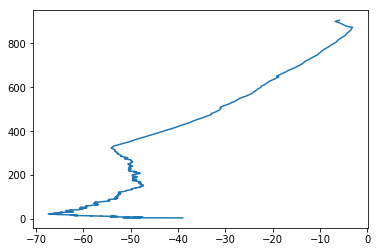

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

#slicing the pressure and temperature columns and assigning variables to them
pre = data1.loc[:,'Pressure']
temp=data1.loc[:,'Temperature']

#plotting the two variables 
plt.plot(temp,pre)

## Task 2x (extra credit): Make the plot prettier

As above, but make sure that

- the plot contains labels on the x- and y-axes, so that the reader can better understand what the plot is showing
- the y-axis goes from surface (at the bottom) to top-of-atmosphere (at the top) instead of the other way around, so that the plot is more intuitive

Text(0,0.5,'Air Pressure [hPa]')

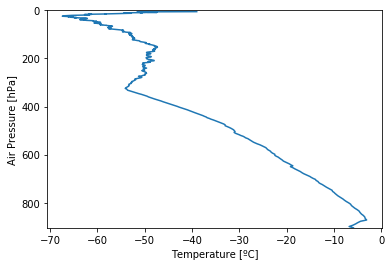

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp,pre)

#changing the order of y-axis limits
plt.ylim(max(pre),0)

#labelling x and y axes in the plot
plt.xlabel('Temperature [ºC]')
plt.ylabel('Air Pressure [hPa]')

## Task 3: Calculate ozone mixing ratio

1. Calculate the ozone mixing ratio (in *ppm*) for each measurement from the file you opened above.
2. Add the ozone mixing ratio as an additional column to your `DataFrame`
3. Create a plot of pressure (on the y-axis) vs. ozone mixing ratio (on the x-axis).

**Hint:**

- You can calculate the mixing ratio as $\frac{O_3\ partial\ pressure}{air\ pressure}$

In [58]:
# 1)calculating ozone mixing ratio in ppm

O3pp=data1.loc[:,'O3PartialPressure']

#Units of ozone partial pressure (O3pp) are in mPa
#Ozone_mixing_ratio = O3pp[mPa]/pre[hpa] = (O3pp/pre)* (10**-5)
#Ozone_mixing_ratio in ppm = (O3pp/pre)*(10**-5)*(10**6) = (O3pp/pre)*10

Ozone_mixing_ratio = (O3pp/pre)*10
Ozone_mixing_ratio.head()

0    0.013488
1    0.014791
2    0.016224
3    0.018808
4    0.022079
dtype: float64

In [59]:
# 2)adding Ozone_mixing_ratio as an additional column to the dataframe 

data1.loc[:,'Ozone Mixing Ratio'] = Ozone_mixing_ratio
data1.head()

,Pressure,O3PartialPressure,Temperature,Ozone Mixing Ratio
0,904.48,1.22,-5.9,0.013488
1,899.22,1.33,-6.8,0.014791
2,893.73,1.45,-6.0,0.016224
3,887.93,1.67,-5.4,0.018808
4,883.18,1.95,-5.0,0.022079


Text(0,0.5,'Air Pressure [hPa]')

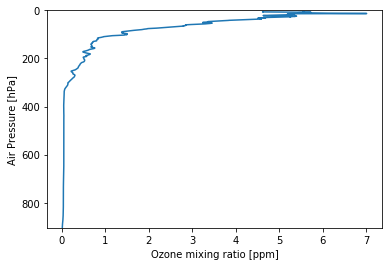

In [60]:
# 3)plotting pressure vs ozone mixing ratio

import matplotlib.pyplot as plt
plt.plot(Ozone_mixing_ratio,pre)
plt.ylim(max(pre),0)
plt.xlabel('Ozone mixing ratio [ppm]')
plt.ylabel('Air Pressure [hPa]')

## Task 4: Calculate statistics for one sonde flight

Write a function that takes a filename as its only input, and which returns the minimum, maximum, and average ozone mixing ratio.

Use this function to calculate these statistics for one of the data files.

In [61]:
def cal_o3_statistics(filename):
    data2= pd.read_csv(filename,skiprows=36)
    pre2 = data2.loc[:,'Pressure']
    O3pp2= data2.loc[:,'O3PartialPressure']
    Ozone_mixing_ratio2 = (O3pp2/pre2)*10
    minimum=[Ozone_mixing_ratio2.min()]
    maximum=[Ozone_mixing_ratio2.max()]
    average=[Ozone_mixing_ratio2.mean()]
    return [minimum, maximum, average]

cal_o3_statistics('20180209.brewer-mast.na.na.dwd-mohp.csv')

[[0.00521081632426799], [9.473684210526315], [2.8779544092932365]]

## Task 5: Calculate statistics for all sonde flights

Using a *for-loop* and the function you wrote above, create a list which contains, for all the data files, the maximum of the respective sonde flight.  So if, e.g., there were 10 data files, the list should have 10 elements.  The list should have the maxmimum from the *first* data file as its first element, and the maximum from the *last* data file as its last element.

**Hint:**
- You can use the `.sort()` method of a list.

In [62]:
import glob
flight=glob.glob('*.brewer-mast.na.na.dwd-mohp.csv')
flight.sort()
flight

maximum_values=[]
for csvfile in flight:
    max_value = cal_o3_statistics(csvfile)[1]
    maximum_values.extend(max_value)
print(maximum_values)      

[7.526555386949925, 7.011406844106464, 6.197740112994351, 9.473684210526315, 6.646928201332347, 5.6212191717077715, 6.741682974559686, 8.289322617680826, 6.523400191021968, 7.347130761994355, 6.648480124707715, 5.722423614707406]


In [63]:
flight

['20180202.brewer-mast.na.na.dwd-mohp.csv',
 '20180205.brewer-mast.na.na.dwd-mohp.csv',
 '20180207.brewer-mast.na.na.dwd-mohp.csv',
 '20180209.brewer-mast.na.na.dwd-mohp.csv',
 '20180212.brewer-mast.na.na.dwd-mohp.csv',
 '20180214.brewer-mast.na.na.dwd-mohp.csv',
 '20180216.brewer-mast.na.na.dwd-mohp.csv',
 '20180219.brewer-mast.na.na.dwd-mohp.csv',
 '20180221.brewer-mast.na.na.dwd-mohp.csv',
 '20180223.brewer-mast.na.na.dwd-mohp.csv',
 '20180226.brewer-mast.na.na.dwd-mohp.csv',
 '20180228.brewer-mast.na.na.dwd-mohp.csv']

## Task 6: Plot statistics for all sonde flights

Create a plot of maximum ozone mixing ratio (on the y-axis) vs. sonde flight (on the x-axis).

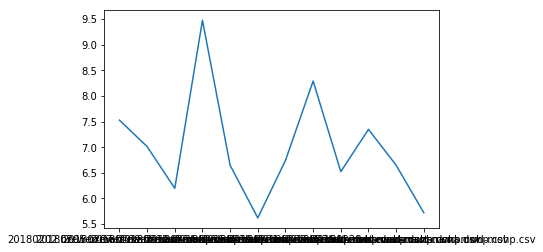

In [64]:
import matplotlib.pyplot as plt
plt.plot(flight,maximum_values)

## Task 6x (extra credit): Make the plot prettier

As above, but label the x- and y-axes.  Also, have the *date* of the measurement (which is part of the filename) as tick labels on the x-axis instead of the filename.  The date should be formatted as "DD MMM" (e.g., *02 Feb*).

**Hint:**
- You can use `datetime.datetime.strptime` to create a *datetime* object from a string, and then use the datetime's `.strftime()` method to create a formatted string from the datetime object.

In [65]:
#converting the filename string into a date string
#source: https://www.tutorialspoint.com/How-to-extract-date-from-a-string-in-Python
import re
name='20180205.brewer-mast.na.na.dwd-mohp.csv'
match=re.search('\d{8}',name)
match= match.group()
print(match)
type(match)

20180205


str

In [66]:
#converting a date string into a datetime object
#source: https://www.tutorialspoint.com/How-to-extract-date-from-a-string-in-Python
import datetime
date1=datetime.datetime.strptime(match, '%Y%m%d')
print(date1)
type(date1)

2018-02-05 00:00:00


datetime.datetime

In [67]:
#creating a formatted string from a date time object
date1=date1.strftime('%d %b')
print(date1)
type(date1)

05 Feb


str

In [68]:
#using all the above statements in one loop

import re
import datetime
dt=[]
for name in flight:
    match=re.search('\d{8}',name)
    match= match.group()
    date1=datetime.datetime.strptime(match, '%Y%m%d')
    date1=[date1.strftime('%d %b')]
    dt.extend(date1)
print(dt)

['02 Feb', '05 Feb', '07 Feb', '09 Feb', '12 Feb', '14 Feb', '16 Feb', '19 Feb', '21 Feb', '23 Feb', '26 Feb', '28 Feb']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

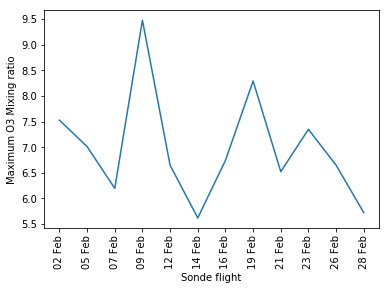

In [69]:
#plotting the date vs maximum ozone mixing ratio

plt.plot(dt,maximum_values)
plt.xlabel('Sonde flight')
plt.ylabel('Maximum O3 Mixing ratio')
plt.xticks(rotation=90)

## Task 7: Plot all data

Using a *for-loop*, create a plot of pressure (on the y-axis) vs. ozone mixing ratio (on the x-axis), with one separate line for each of the sonde flights.  Create a legend which shows the date corresponding to each line.  If possible, give the legend the title *Date*.

**Hint:**
- Don't worry if the legend takes up almost all the space and nothing is really visible.

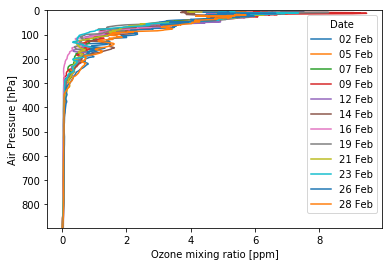

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
dt=[]
for csvfile in flight:
    data=pd.read_csv(csvfile,skiprows=36)
    pre = data.loc[:,'Pressure']
    O3pp=data.loc[:,'O3PartialPressure']
    Ozone_mixing_ratio = (O3pp/pre)*10
    match=re.search('\d{8}',csvfile)
    match= match.group()
    date1=datetime.datetime.strptime(match, '%Y%m%d')
    date1=[date1.strftime('%d %b')]
    dt.extend(date1)
    plt.plot(Ozone_mixing_ratio,pre)
    plt.ylim(max(pre),0)
    plt.xlabel('Ozone mixing ratio [ppm]')
    plt.ylabel('Air Pressure [hPa]')
    plt.legend(dt,title='Date')  

## Task 7x (extra credit): Plot only part of the data

As above, but only plot the data which was measured on a *Wednesday*.

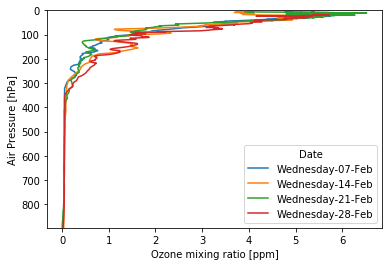

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
dt=[]
for csvfile in flight:
    data=pd.read_csv(csvfile,skiprows=36)
    pre = data.loc[:,'Pressure']
    O3pp=data.loc[:,'O3PartialPressure']
    Ozone_mixing_ratio = (O3pp/pre)*10
    match=re.search('\d{8}',csvfile)
    match= match.group()
    date1=datetime.datetime.strptime(match, '%Y%m%d')
    date2=[date1.strftime('%d %b')]
    date3=[date1.strftime('%A-%d-%b')]
    if 'Wednesday' in date3[0]:
        dt.extend(date3)
        plt.plot(Ozone_mixing_ratio,pre)
        plt.ylim(max(pre),0)
        plt.xlabel('Ozone mixing ratio [ppm]')
        plt.ylabel('Air Pressure [hPa]')
        plt.legend(dt,title='Date')        

### The End ###